In [2]:
import pickle5
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/

In [3]:
import sys
import os
sys.path.insert(0, './../scripts')

In [6]:
from importlib import reload
from tqdm import tqdm
import network as network

input_dir='./../Paper_Results'
output_dir='./../Paper_Figures'

In [7]:
J_Vec=np.array([0.00012341, 0.00031122, 0.00078486, 0.001, 0.00197932]) #np.exp(np.linspace(-9,-5.3,nJs))

J_Vec*1000

array([0.12341, 0.31122, 0.78486, 1.     , 1.97932])

In [208]:
r_X_Vec

array([  1.25892541,   2.04696827,   3.32829814,   5.41169527,
         8.79922544,  14.30722989,  23.26305067,  37.82489906,
        61.50195043, 100.        ])

# Load all output

In [192]:
nrates=10
nJs=5
nreps=100
nrep_Vec=range(nreps)
r_X_Vec=10**(np.linspace(0.1,2,nrates))
J_Vec=np.array([0.00012341, 0.00031122, 0.00078486, 0.001, 0.00197932]) #np.exp(np.linspace(-9,-5.3,nJs))

tensor="True"
fun_vecs_names=["ReLU","SSN","Non-Sat LIF","LIF"]


moments_of_r_sim=np.zeros((5,4,nrates,nJs,nreps))*np.nan


for idx_nrep, nrep in zip(range(nreps),nrep_Vec):
    for idx_rX, rX in zip(range(nrates),r_X_Vec):
        for idx_J, J in zip(range(nJs),J_Vec):
            #--------------------------------------------------------------------------
            # Make SBTACH
            inpath = input_dir + "/FigureS1_"
            if np.round(rX)==14 or np.floor(rX)==61:
                c1 = "nrep={:d}rX_{:.5f}-J_{:6f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)
            elif np.round(rX)==100 :
                c1 = "nrep={:d}rX_{:.1f}-J_{:6f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)
#             elif J==0.001:
#                 c1 = "nrep={:d}rX_{:.6f}-J_{:.3f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)
            else:
                c1 = "nrep={:d}rX_{:.6f}-J_{:6f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)


            try:
                with open(inpath+c1, 'rb') as handle5:
                    aux_mat = pickle5.load(handle5)
                moments_of_r_sim[:,:,idx_rX,idx_J,idx_nrep]=aux_mat["moments_of_r_sim"]
            except:
                pass
              #  print(c1)

output_dict={}
output_dict["moments_of_r_sim"]=moments_of_r_sim
output_dict["functions_names"]=fun_vecs_names
output_dict["r_X_Vec"]=r_X_Vec
output_dict["J_Vec"]=J_Vec
output_dict["nrep_Vec"]=nrep_Vec



nameout='FigureS1_moments'
with open(input_dir+nameout+'.pkl', 'wb') as handle:
    pickle.dump(output_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
     

In [210]:
# J=0.00197932
# rX=100
# nrep=0
# c1 = "nrep={:d}rX_{:.1f}-J_{:6f}-nrep_{:d}-tensor_{:s}.pkl".format(nrep, rX, J,nrep, tensor)


# with open(inpath+c1, 'rb') as handle5:
#     aux_mat = pickle5.load(handle5)

# Plot moments Vs Rates

/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/agos/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/agos/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/agos/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/agos/anaconda3/lib/python3.6/site

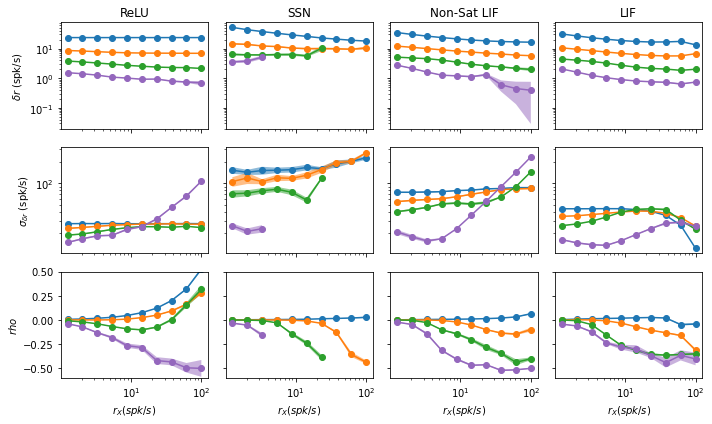

In [194]:

rows=3;cols=len(fun_vecs_names);
fig, axs = plt.subplots(rows,cols, figsize=(2*cols,2.*rows), facecolor='w', edgecolor='k',squeeze=False,sharey='row',sharex='col')
fig.subplots_adjust(hspace = .1, wspace=.1)

nameout='FigureS1'

for idx_funcs in range(len(fun_vecs_names)):

    
    this_mean_over = np.nanmean(moments_of_r_sim[:,idx_funcs,:,:,:],-1)
    this_std_over  = np.nanstd(moments_of_r_sim[:,idx_funcs,:,:,:],-1)


    for idx_J, J in zip(range(nJs),J_Vec):

        this_sq_N=np.sqrt(sum(np.isnan(moments_of_r_sim[1,idx_funcs,1,idx_J,:])))
        this_sum=this_mean_over+this_std_over/this_sq_N
        this_subs=this_mean_over-this_std_over/this_sq_N


        axs[0,idx_funcs].loglog(r_X_Vec,this_mean_over[1,:,idx_J], marker='o',label=J)
        axs[0,idx_funcs].fill_between(r_X_Vec, this_subs[1,:,idx_J],this_sum[1,:,idx_J], alpha=0.5)
        
        axs[0,idx_funcs].set_label(J)

        axs[1,idx_funcs].loglog(r_X_Vec,this_mean_over[3,:,idx_J], marker='o',label='std')
        axs[1,idx_funcs].fill_between(r_X_Vec, this_subs[3,:,idx_J],this_sum[3,:,idx_J], alpha=0.5)


        axs[1,idx_funcs].set_label(J)

        axs[2,idx_funcs].plot(r_X_Vec,this_mean_over[4,:,idx_J],marker='o',label='std')
        axs[2,idx_funcs].fill_between(r_X_Vec, this_subs[4,:,idx_J],this_sum[4,:,idx_J], alpha=0.5)


        axs[2,idx_funcs].set_xlabel('$r_X (spk/s)$')
        axs[2,idx_funcs].set_label(J)
        
    axs[0,idx_funcs].set_title(fun_vecs_names[idx_funcs])
axs[0,0].set_ylabel('$\delta r$ (spk/s)')
axs[1,0].set_ylabel('$\sigma_{\delta r}$ (spk/s)')
axs[2,0].set_ylabel('$rho$ ')
axs[2,0].set_ylim([-0.6,0.5])
fig.set_size_inches(2.5*cols,2.*rows)

fig.tight_layout()
fig.savefig(input_dir+'/'+nameout+'.pdf', bbox_inches='tight')
